In [4]:
import torch
from matplotlib import pyplot as plt
from torch.utils.data import DataLoader
from torchvision import transforms
from torchvision.datasets import MNIST
from torch import nn
import torch.nn.functional as f
import wandb

wandb.init(project='simple_auto', entity='zirui23')


class ConvAutoEncoder(nn.Module):
    def __init__(self):
        super().__init__()
        
        #encoder
        self.conv1 = nn.Conv2d(1, 3, 3)
        self.pooling = nn.MaxPool2d(2,2)
        self.conv2 = nn.Conv2d(3, 16, 2)
        self.pooling = nn.MaxPool2d(2,2)
        #decoder
        self.t_conv1 = nn.ConvTranspose2d(16, 3, 4, stride=2)
        self.t_conv2 = nn.ConvTranspose2d(3, 1, 2, stride=2)
    

    def forward(self, x):
            x = torch.relu(self.conv1(x))
            x = self.pooling(x)
            x = torch.relu(self.conv2(x))
            x = self.pooling(x)
            latent1 = x
            x = torch.relu(self.t_conv1(x))
            x = torch.sigmoid(self.t_conv2(x))
            
            return x, latent1


epoch,▁▁▁▁▂▂▂▂▂▂▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▇▇▇▇▇▇████
loss,▆▅▄▃▆▄▃▃▄▇▆▂▁▂█▄█▃█▄▅▅▇▃▃▇▇▆▆▅▆▅▅▆▄▂▇▅▇▆
epoch,19
loss,0.9219


In [5]:
batch_size = 32
learning_rate = 2e-3
num_epochs = 10


data_train = MNIST('~/mnist_data', train=True, download=True,
                   transform=transforms.Compose([transforms.ToTensor(),transforms.Normalize([0.5],[0.5])]))
data_loader = DataLoader(data_train, batch_size=batch_size, shuffle = False)

model = ConvAutoEncoder()
criterion = nn.MSELoss()
optimizer = torch.optim.AdamW(
    model.parameters(), lr=learning_rate)

import matplotlib.pyplot as plt

for epoch in range(num_epochs): 
    for data in data_loader:
        #print(data[0].size())
        img, labels = data
        #print(img.size())
        #img = img.view(img.size(0),-1)
        #print(img.size())
        
        output,latent1 = model(img)
        
        #print(latent1.size())
        
        #print(output.size())
        loss = criterion(output,img)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        
        wandb.log({'epoch': epoch, 'loss': loss})
        
            
    
    print(f'epoch [{epoch + 1}/{num_epochs}], loss:{loss.data.item()}')


epoch [1/10], loss:0.9219261407852173
epoch [2/10], loss:0.9219055771827698
epoch [3/10], loss:0.9219017028808594
epoch [4/10], loss:0.9176324605941772
epoch [5/10], loss:0.9063122868537903
epoch [6/10], loss:0.9052520990371704
epoch [7/10], loss:0.893393874168396
epoch [8/10], loss:0.8783556818962097
epoch [9/10], loss:0.8684847354888916
epoch [10/10], loss:0.8620284795761108


torch.Size([32, 1, 28, 28])
torch.Size([28, 28])


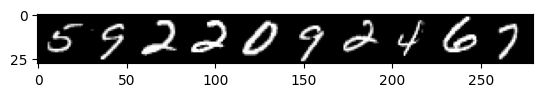

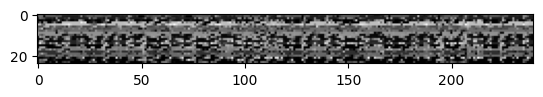

torch.Size([1, 28, 28])
tensor([0.8937])


/Users/zarius/miniconda3/lib/python3.9/site-packages/torch/nn/modules/loss.py:536: UserWarning: Using a target size (torch.Size([28, 28])) that is different to the input size (torch.Size([1, 28, 28])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


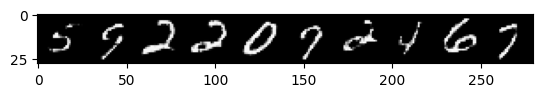

tensor([0.8937, 0.8767, 0.8295, 0.8443, 0.7816, 0.8734, 0.8687, 0.9207, 0.8111,
        0.8927])


In [6]:
import numpy as np
#print(latent.size())
print(img.size())


img = img.view(32,28,28)
print(img[0].size())
display = np.array(img[0].detach(),dtype='float')
pixels = display.reshape((28, 28))

for i in range(1,10,1):
    #print(i)
    display_1 = np.array(img[i].detach(),dtype='float')
    pixels_1 = display_1.reshape((28, 28))
    pixels= np.concatenate((pixels,pixels_1),axis=1)
    
plt.imshow(pixels, cmap='gray')
plt.show()


latent1 = latent1.view(32,24,24)
#print(output[0].size())
display = np.array(latent1[0].detach(),dtype='float')
pixels = display.reshape((24, 24))

for i in range(1,10,1):
    #print(i)
    display_1 = np.array(latent1[i].detach(),dtype='float')
    pixels_1 = display_1.reshape((24, 24))
    pixels= np.concatenate((pixels,pixels_1),axis=1)
    
plt.imshow(pixels, cmap='gray')
plt.show()




output = output.view(32,1,28,28)
print(output[0].size())
display = np.array(output[0].detach(),dtype='float')
pixels = display.reshape((28, 28))
Loss_T = criterion(output[0],img[0]).detach().view(1)
print(Loss_T)

for i in range(1,10,1):
    #print(i)
    display_1 = np.array(output[i].detach(),dtype='float')
    pixels_1 = display_1.reshape((28, 28))
    pixels= np.concatenate((pixels,pixels_1),axis=1)
    Loss_T = torch.cat((Loss_T,criterion(output[i],img[i]).detach().view(1)),-1)
    
plt.imshow(pixels, cmap='gray')
plt.show()
print(Loss_T)

